In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from functools import reduce
import collections
%matplotlib inline

#### CREDITS DATA SET

Let's analyze the data set of Credits. The target is to see what information there is, how it is structured, if there are null or empty data and finally obtain a final data set with the information that may be useful for the model

In [2]:
# The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. 
# Pandas tries to determine what dtype to set by analyzing the data in each column

df_credits = pd.read_csv("the_movies_dataset/credits.csv", low_memory = False)

In [3]:
df_credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
df_credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

After a first view of the dataframe we can see that there are 3 variables: cast, crew and id of the movie.
<br>
There are 45476 records and apparently no null data.
<br>
Let's see the information of each variable.

In [6]:
df_credits["cast"][0][0:1000]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [7]:
df_credits["crew"][0][0:1000]

"[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depar

In [8]:
df_credits["id"][0]

862

#### Cast Column

We can see that the information in the variables "cast" and "crew" are in JSON format. There are lists of dicts.
<br>
We are going to convert the JSON data into a list of dicts. This operation we will use it more times, so we create a function.

In [9]:
def to_list(column, key):
    
    new_column = column.fillna('[]').apply(ast.literal_eval).apply(lambda x: [i[key] for i in x] 
                                                                   if isinstance(x, list) else [])
    
    return new_column

This function takes the values of the key that are in the dictionary. For example, if we want the cast names we need to assign key = "name" in the input of the function.

As we see above we have the following keys per movie:
* cast_id
* character
* credit_id
* gender
* id
* name
* order
* profile_path

For the purpose of this project we only take the cast names and the cast gender. And we think that we don't need all the cast per movie, only the main 4 actors/actresses.

In [10]:
df_credits["cast_names"] = to_list(df_credits["cast"], "name")
df_credits["cast_gender"] = to_list(df_credits["cast"], "gender")
df_credits["cast_order"] = to_list(df_credits["cast"], "order")

In [11]:
df_credits.head()

,cast,crew,id,cast_names,cast_gender,cast_order
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[2, 2, 1, 1, 1, 2, 2]","[0, 1, 2, 3, 4, 5, 6]"
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"


It seems that the cast are in order, but let's check it

In [12]:
example = [0, 1, 2, 3, 4, 5, 6]

def is_order(input_list):
    return all(input_list[i] <= input_list[i + 1] for i in range(len(input_list) - 1))
    
is_order(example)

True

In [13]:
df_credits[df_credits["cast_order"].apply(is_order) == False]

,cast,crew,id,cast_names,cast_gender,cast_order


Ok, so we take only the first 4 elements of cast_names and cast_order and drop cast and cast_order columns

In [14]:
df_credits["cast_names"] = df_credits["cast_names"].apply(lambda x: x[0:4])
df_credits["cast_gender"] = df_credits["cast_gender"].apply(lambda x: x[0:4])
df_credits.drop("cast", axis = 1, inplace = True)
df_credits.drop("cast_order", axis = 1, inplace = True)

In [15]:
df_credits.head()

,crew,id,cast_names,cast_gender
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney]","[2, 2, 2, 2]"
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0]"
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[2, 2, 1, 1]"
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1]"
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[2, 1, 2, 1]"


Let's see the most frequent cast names and the count difference between genders. For this we create a function that make a word count.

In [16]:
def word_count(dataframe, ref_variable):
    values_list = []
    
    for elements_list in dataframe[ref_variable]:
        for value in elements_list:
            values_list.append(value)
    
    return collections.Counter(values_list)

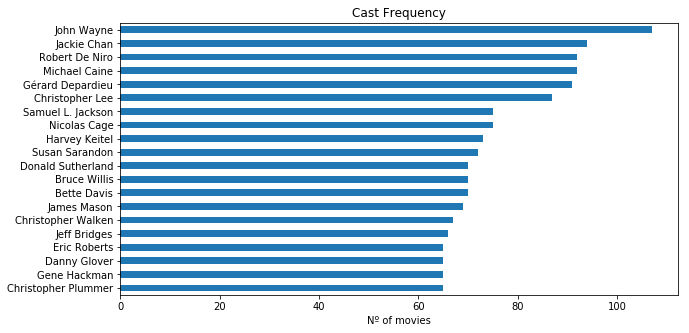

In [17]:
cast_counter = word_count(df_credits, "cast_names")
plt.subplots(figsize = (10, 5))

ax = pd.Series(cast_counter).sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Cast Frequency") 

plt.show()

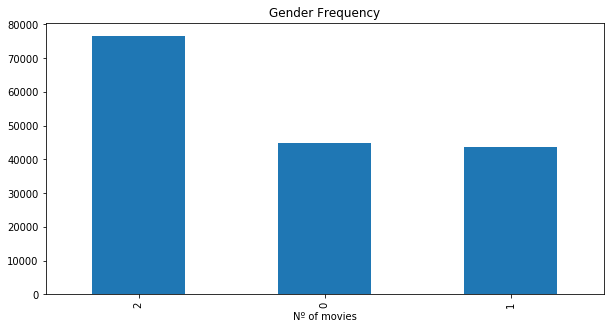

In [18]:
gender_counter = word_count(df_credits, "cast_gender")
plt.subplots(figsize = (10, 5))

ax = pd.Series(gender_counter).sort_values(ascending = False).plot.bar()
ax.set_xlabel("Nº of movies")
ax.set_title("Gender Frequency")

plt.show()

#### Crew Column

In this case we don't know the keys we want as we did in the cast column. For this reason, we have first to convert this column into a list of dictionaries and see more deeply what we have.

In [19]:
def to_dict(dataframe, column):
    
    dataframe[column] = dataframe[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return dataframe

In [20]:
df_credits = to_dict(df_credits, "crew")

In [21]:
df_credits["crew"][0][0:2]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}]

As we see, there are several departments and different jobs per department with the information of the person. In a first instance, we will focus on obtaining the name of the director, producer and scriptwriter.

So, first step is to check how many departments are and see the diferent jobs per department.
<br>
For this task we will create a dictionary in which the key will be the department and the values will be the diferent jobs.

In [22]:
departments_dict = {}

for i in df_credits["crew"]:   
    for j in range(len(i)): 
        
        department = list(filter(lambda item: item[0] == "department", i[j].items()))[0][1]
        job = list(filter(lambda item: item[0] == "job", i[j].items()))[0][1]
        
        if department not in departments_dict:
            departments_dict[department] = [job]
            
        else:
            if job not in departments_dict[department]:
                departments_dict[department] += [job]

How many jobs are per department?

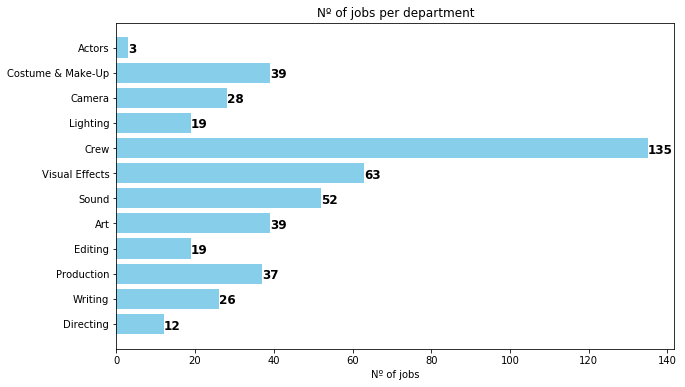

In [23]:
fig, ax = plt.subplots(figsize = (10, 6))

values = list(map(lambda value: len(value), departments_dict.values()))
departments = list(departments_dict.keys())
y_pos = np.arange(len(departments))

ax.barh(y_pos, values, color = "skyblue")
ax.set_yticks(y_pos)
ax.set_yticklabels(departments)

for i, v in enumerate(values):
    ax.text(v, i - 0.2, str(v), fontsize = 12, color = "black", weight = "bold")

ax.set_xlabel("Nº of jobs")
ax.set_title("Nº of jobs per department")    
    
plt.show()

Let's see the different jobs in the departments: Production, Writing and Directing

In [24]:
for department in ["Production", "Writing", "Directing"]:
    print(department + "\n", departments_dict[department],"\n")

Production
 ['Producer', 'Executive Producer', 'Production Supervisor', 'Production Coordinator', 'Casting Consultant', 'ADR Voice Casting', 'Casting', 'Associate Producer', 'Unit Production Manager', 'Casting Associate', 'Production Manager', 'Casting Assistant', 'Location Manager', 'Co-Producer', 'Production Accountant', 'Line Producer', 'Assistant Production Manager', 'Local Casting', 'Finance', 'Co-Executive Producer', 'Executive In Charge Of Post Production', 'Executive In Charge Of Production', 'Publicist', 'Unit Manager', 'Production Office Coordinator', 'Other', 'Assistant Production Coordinator', 'Character Technical Supervisor', 'Administration', 'Researcher', 'Executive Consultant', 'Supervising Producer', 'Script Researcher', 'Consulting Producer', 'Production Director', 'Development Manager', 'Coordinating Producer'] 

Writing
 ['Screenplay', 'Original Story', 'Novel', 'Characters', 'Writer', 'Story', 'Author', 'Adaptation', 'Script Editor', 'Storyboard', 'Theatre Play', '

We extract the data that we consider relevant from a movie:
- Director name (department Directing --> job Director)
- Producer name (department Production --> job Producer)
- Screenplay name (department Writing --> job Screenplay)
<br>
<br>
(((In the event that a film has more than one director, producer or screenwriter, we only extract the first))) ??

In [25]:
# This code is using list comprehension 
# We go through the crew column and extract the required information

producer_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Production" and i[j]["job"] == "Producer"] 
                for i in df_credits["crew"]]

director_df = [[i[j]["name"] for j in range(len(i)) 
                if i[j]["department"] == "Directing" and i[j]["job"] == "Director"] 
                for i in df_credits["crew"]]

screenplay_df = [[i[j]["name"] for j in range(len(i)) 
                 if i[j]["department"] == "Writing" and i[j]["job"] == "Screenplay"] 
                 for i in df_credits["crew"]]

# In the event that a film has more than one director, producer or screenwriter, we extract the first one from the list. 
# In the event that a film does not have information about the director, producer or screenwriter, we extract it as NaN.

# producer_df = [i[0] if len(i) != 0 else np.nan for i in producer_df]
# director_df = [i[0] if len(i) != 0 else np.nan for i in director_df]
# screenplay_df = [i[0] if len(i) != 0 else np.nan for i in screenplay_df]

In [26]:
print(producer_df[:4])
print(director_df[:4])
print(screenplay_df[:4])

[['Bonnie Arnold', 'Ralph Guggenheim'], ['Scott Kroopf', 'William Teitler'], [], ['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schindler', 'Caron K']]
[['John Lasseter'], ['Joe Johnston'], ['Howard Deutch'], ['Forest Whitaker']]
[['Joss Whedon', 'Andrew Stanton', 'Joel Cohen', 'Alec Sokolow'], ['Jonathan Hensleigh', 'Greg Taylor', 'Jim Strain'], [], ['Ronald Bass', 'Terry McMillan']]


Introduce in the Data Frame and remove the crew original column

In [27]:
# Remove originals cast and crew columns
df_credits.drop("crew", axis = 1, inplace = True)

# Creation new columns
df_credits["Director"] = pd.Series(director_df).values
df_credits["Producer"] = pd.Series(producer_df).values
df_credits["Screenplay"] = pd.Series(screenplay_df).values

In [28]:
df_credits.head()

,id,cast_names,cast_gender,Director,Producer,Screenplay
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney]","[2, 2, 2, 2]",[John Lasseter],"[Bonnie Arnold, Ralph Guggenheim]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec..."
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0]",[Joe Johnston],"[Scott Kroopf, William Teitler]","[Jonathan Hensleigh, Greg Taylor, Jim Strain]"
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[2, 2, 1, 1]",[Howard Deutch],[],[]
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[1, 1, 1, 1]",[Forest Whitaker],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[Ronald Bass, Terry McMillan]"
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[2, 1, 2, 1]",[Charles Shyer],[Nancy Meyers],"[Nancy Meyers, Albert Hackett]"


Let's see the most frequent Director, Producers and Screenplay names.

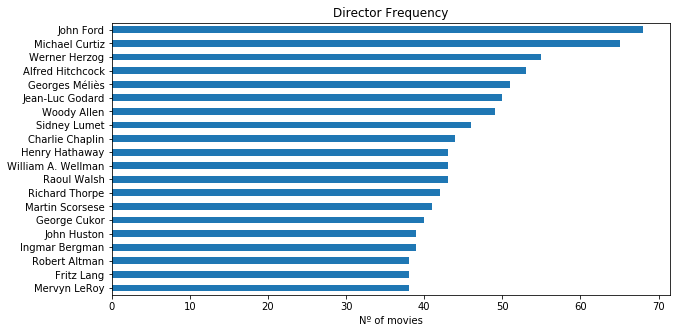

In [29]:
director_counter = word_count(df_credits, "Director")
plt.subplots(figsize = (10, 5))

ax = pd.Series(director_counter).sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Director Frequency") 

plt.show()

John Ford in the top 1, with movies like:
* The Quiet Man (1952)
* The Man Who Shot Liberty Valance (1962)
* The Grapes of Wrath (1940)

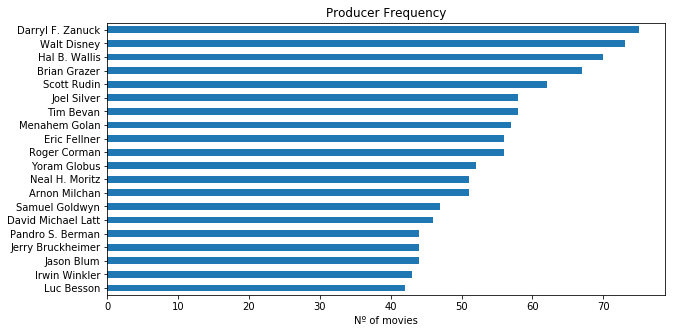

In [30]:
producer_counter = word_count(df_credits, "Producer")
plt.subplots(figsize = (10, 5))

ax = pd.Series(producer_counter).sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Producer Frequency") 

plt.show()

Darryl F. Znuck is the top 1. Here some of his most popular movies:
* The Grapes of Wrath (1940)
* In Old Chicago (1938)
* The Longest Day (1962)
* All About Eve (1950)

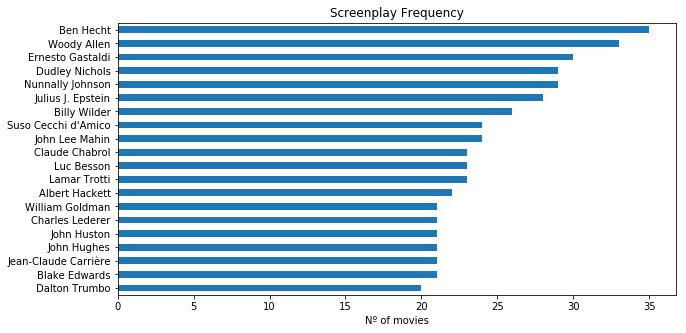

In [31]:
screenplay_counter = word_count(df_credits, "Screenplay")
plt.subplots(figsize = (10, 5))

ax = pd.Series(screenplay_counter).sort_values(ascending = True)[-20:].plot.barh()
ax.set_xlabel("Nº of movies")
ax.set_title("Screenplay Frequency") 

plt.show()

Ben Hecht is the top 1. Here some of his most popular movies:
* Notorious (1946)
* The Scoundrel (1935)
* Angels Over Broadway (1940)
* Spellbound (1945)

In [32]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 6 columns):
id             45476 non-null int64
cast_names     45476 non-null object
cast_gender    45476 non-null object
Director       45476 non-null object
Producer       45476 non-null object
Screenplay     45476 non-null object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB
